1) Crie um array x com 200 pontos, começando de -10 até 10. Depois calcule as seguintes funções sobre esse array:

y1 = sen(x) / x

y2 = 1 / (1-e^(-x))

Por fim, plot essas duas funções, em função do x, ambas em uma mesma figura, porém, em dois axes distintos (um abaixo do outro).

Text(0.5, 0, 'Eixo x')

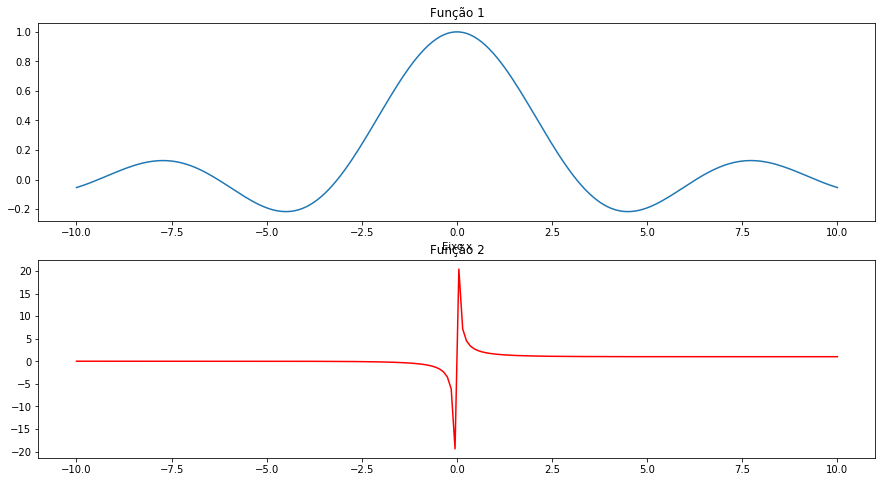

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-10, 10, 200)

y1 = np.sin(x)/x

y2 = 1/(1-np.e**(-x))

fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

axes[0].plot(x, y1)

axes[1].plot(x, y2, color='red')

axes[0].set_title('Função 1')
axes[1].set_title('Função 2')
axes[0].set_xlabel('Eixo x')

# note que colocar títulos e labels pode encavalar o gráfico:

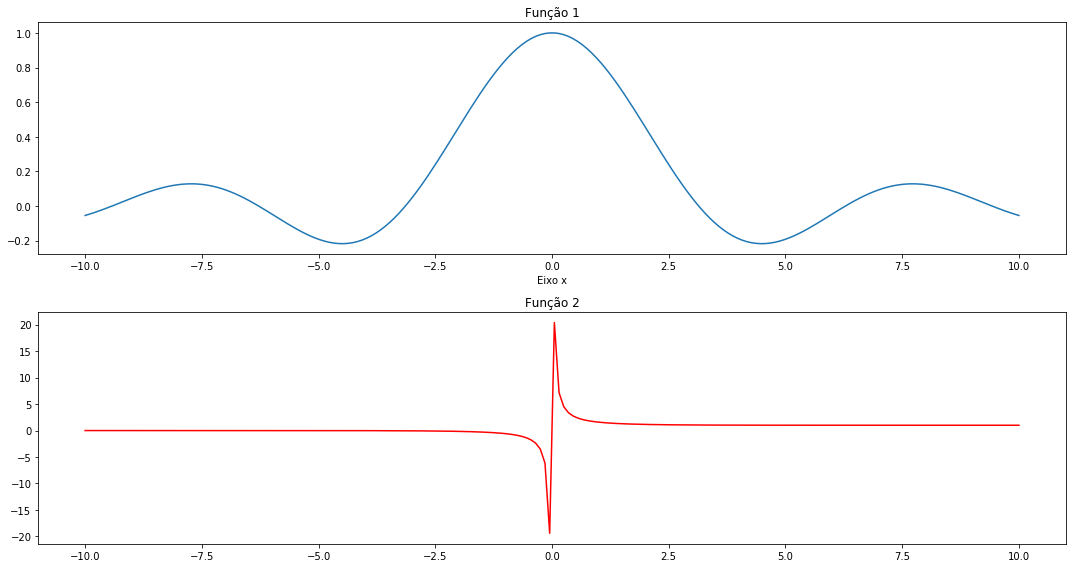

In [2]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(15, 8))

axes[0].plot(x, y1)

axes[1].plot(x, y2, color='red')

axes[0].set_title('Função 1')
axes[1].set_title('Função 2')
axes[0].set_xlabel('Eixo x')

fig.tight_layout() # essa linha resolve o problema de "encavalamento": note que agora não tem sobreposição de texto!

2) Carregue o arquivo avocado.csv e, em seguida, siga as instruções abaixo:

(a) Obtenha apenas os dados desse dataset que são referentes à região da Califórnia (California), no ano de 2017; e salva-os em um novo dataframe.

(b) A partir do dataframe obtido no item (a), obtenha apenas os dados referentes à abacates do tipo convencional; em seguida, salve em um novo dataframe.

(c) Utilizando o dataframe salvo no item (b), crie um gráfico de linha que apresente a variação do preço médio do abacate ao longo do ano de 2017 (datas) na região da Califórnia.

(d) Utilizando o dataframe salvo no item (a), crie um gráfico de pizza que apresente o percentual do volume total de abacates vendidos para cada tipo: convencional e orgânico.

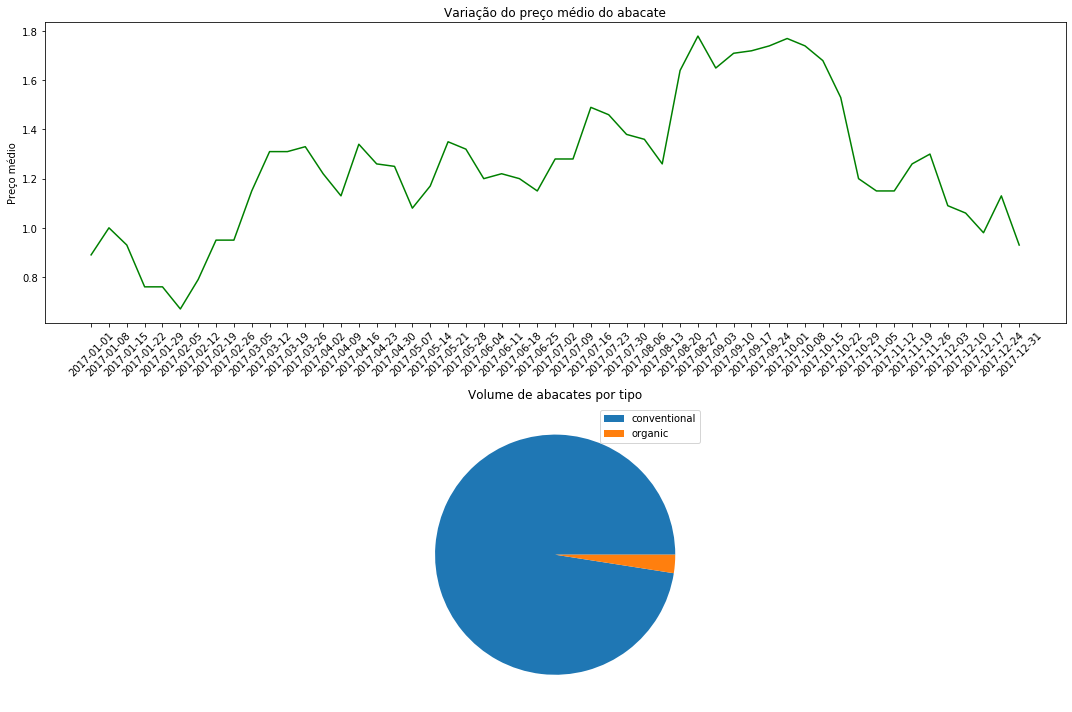

In [3]:
# Esse vai um pouco menos "mastigado" porque não é um dos que fiz em sala de aula

import pandas as pd

avocado = pd.read_csv('avocado.csv')

# Item A
california = avocado[avocado['region'] == 'California']

plt.figure(figsize=(15, 10))

# Item B
conventional = california[california['type'] == 'conventional']

# Item C
ordenado = conventional[(conventional['Date'] > '2016-12-31') & (conventional['Date'] < '2018-01-01')].sort_values(by=['Date'], 
                                                                                                         ascending = True)

plt.subplot(211)
plt.plot(ordenado['Date'], ordenado['AveragePrice'], color='green')
plt.xticks(rotation=45)
plt.ylabel('Preço médio')
plt.title('Variação do preço médio do abacate')
california.head()

# Item D
por_tipo = california.groupby('type')['Total Volume'].sum()
tipos = list(por_tipo.index)

plt.subplot(212)
plt.pie(por_tipo)
plt.legend(tipos)
plt.title('Volume de abacates por tipo')

plt.tight_layout()

3) Carregue o dataset contido no arquivo cholera-dataset.csv em um objeto DataFrame. Esse dataset contém dados referentes ao número de casos reportados de cólera em cada país, desde 1950 até 2016, além do número de mortes provocadas pela cólera; dentre outras informações.

Após carregar esse dataset, obtenha:

(a) Apenas os dados da Índia.

(b) Crie um gráfico de barras que apresente o número de casos reportados e de mortes causadas pela cólera na Índia, ambos em um mesmo axes, em função do ano.

In [4]:
import pandas as pd

colera = pd.read_csv('cholera-dataset.csv')

colera.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
0,Afghanistan,2016,677.0,5.0,0.70,Eastern Mediterranean
1,Afghanistan,2015,58064.0,8.0,0.01,Eastern Mediterranean
2,Afghanistan,2014,45481.0,4.0,0.00,Eastern Mediterranean
3,Afghanistan,2013,3957.0,14.0,0.35,Eastern Mediterranean
4,Afghanistan,2012,12.0,0.0,0.10,Eastern Mediterranean


In [5]:
india = colera[ colera['Country'] == 'India']

india.head()

,Country,Year,Number of reported cases of cholera,Number of reported deaths from cholera,Cholera case fatality rate,WHO Region
862,India,2016,841.0,3.0,0.40,South-East Asia
863,India,2015,889.0,4.0,0.40,South-East Asia
864,India,2014,4031.0,21.0,0.50,South-East Asia
865,India,2013,6008.0,54.0,0.90,South-East Asia
866,India,2010,5155.0,9.0,0.17,South-East Asia


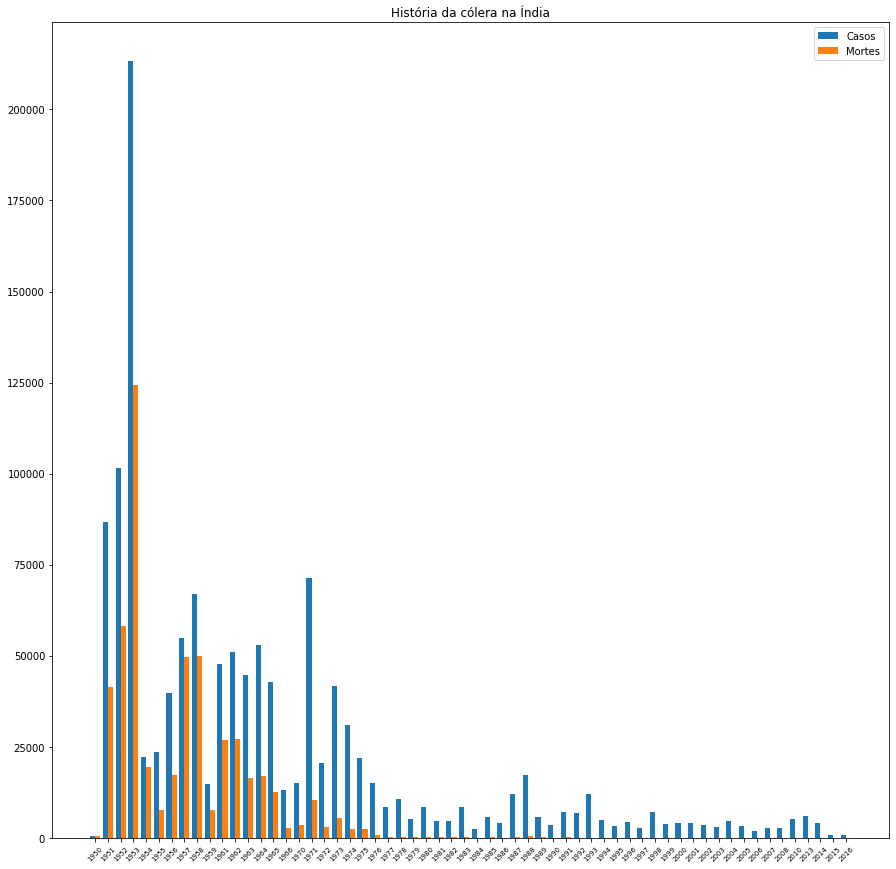

In [6]:
plt.figure(figsize=(15,15))

india = india.sort_values(by=['Year'], ascending = True) # ordenando por ano de maneira crescente

# A lista de valores de "x" para cada série é dada por: [t*x + l*n for x in range(d)]
# onde:
# n: número da série atual
# t: número total de séries
# d: número de pontos
# l: largura de cada barra (o padrão é 0.8)
t = 2 # temos 2 séries: casos e mortes
d = india['Year'].size # cada série tem 5 pontos (no caso, 5 cursos)
l = 0.8
plt.bar([t*x + l*1 for x in range(d)], india['Number of reported cases of cholera'])
plt.bar([t*x + l*2 for x in range(d)], india['Number of reported deaths from cholera'])

# Agora queremos que a "marquinha" fique bem no centro de cada bloco de barras...
# Mas não queremos que apareça números, e sim o nome dos cursos, por isso usaremos o parâmetro "labels"
ticks = [t*x + l*t - l*t/2 + l/t for x in range(d)]
plt.xticks(ticks, labels=india['Year'], rotation=45, fontsize=7)

plt.legend(['Casos', 'Mortes'])
plt.title('História da cólera na Índia');

4) Carregue os dados do arquivo googleplaystore.csv e, em seguida:

(a) Crie um gráfico de pizza que apresente o percentual dos gêneros (Genres) dos aplicativos. Como existem muitos gêneros, considere apenas os 10 primeiros.

(b) Crie um gráfico de barras que contenha a quantidade de aplicativos que foram desenvolvidos para cada versão específica (ou conjunto de versões) do Android, especificadas na coluna Android Ver.

Text(0.5, 1.0, 'Apps por versão Android')

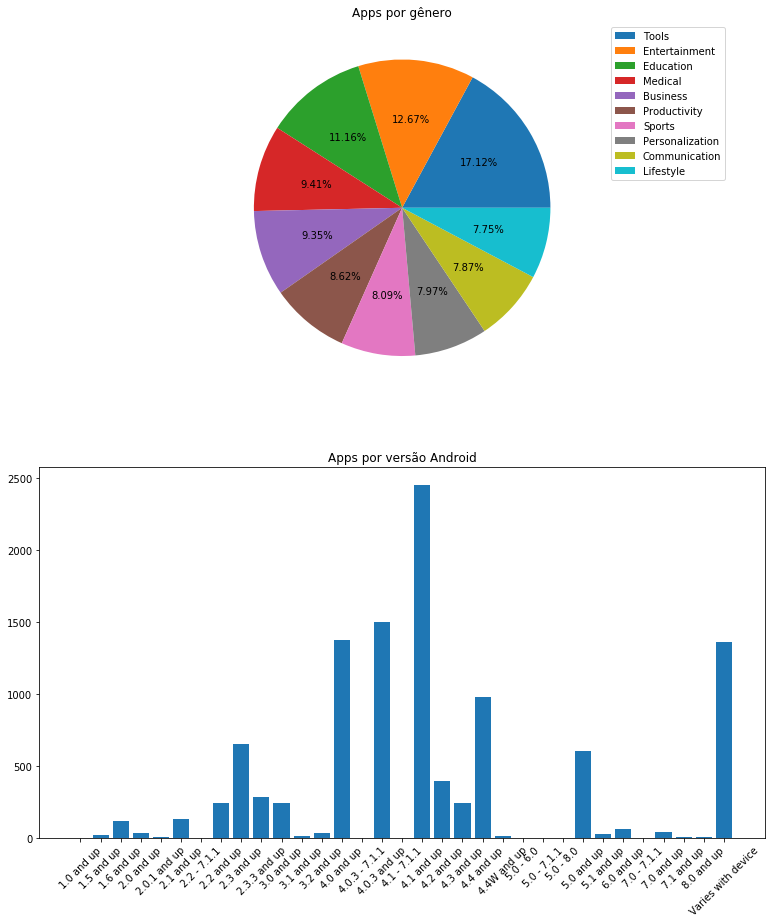

In [7]:
# outro menos mastigado porque não foi em sala de aula

apps = pd.read_csv('googleplaystore.csv')

# item A
generos = apps.groupby('Genres')['App'].count().sort_values(ascending=False)

plt.figure(figsize=(13, 15))
plt.subplot(211)
plt.pie(generos.head(10), autopct='%.2f%%')
plt.legend(generos.head(10).index, bbox_to_anchor=(1.05, 1))
plt.title('Apps por gênero')

# Item B
versao = apps.groupby('Android Ver')['App'].count()

plt.subplot(212)
plt.bar(versao.index, versao)
plt.xticks(rotation=45)
plt.title('Apps por versão Android')

5) Carregue o arquivo houses_to_rent.csv. Em seguida:

(a) Crie um gráfico de dispersão para visualizar uma relação entre a área e o preço total do aluguel do imóvel.

(b) Visualize os outliers presentes na coluna da área utilizando o boxplot.

(c) Faça o mesmo que foi solicitado no item anterior, porém, para a coluna do preço total do aluguel.

(d) Elimine os outliers de ambas as colunas utilizando o método quantile. 

(e) Crie novamente um gráfico de dispersão dos dados da área e preço total do aluguel do imóvel; dessa vez, após a remoção dos outliers de ambas as colunas.

In [8]:
casas = pd.read_csv('houses_to_rent.csv')

casas.head()

,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0,São Paulo,70,2,1,1,7,acept,furnished,2065,3300,211,42,5618
1,São Paulo,320,4,4,0,20,acept,not furnished,1200,4960,1750,63,7973
2,Porto Alegre,80,1,1,1,6,acept,not furnished,1000,2800,0,41,3841
3,Porto Alegre,51,2,1,0,2,acept,not furnished,270,1112,22,17,1421
4,São Paulo,25,1,1,0,1,not acept,not furnished,0,800,25,11,836


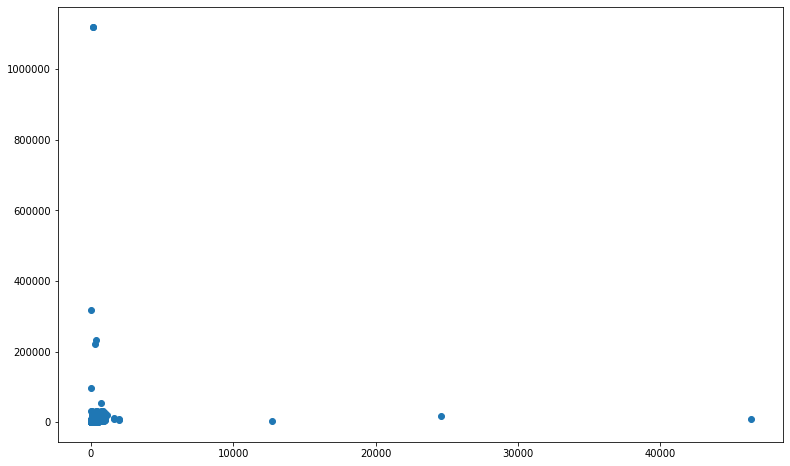

In [9]:
plt.figure(figsize=(13, 8))

plt.scatter(casas['area'], casas['total (R$)'])

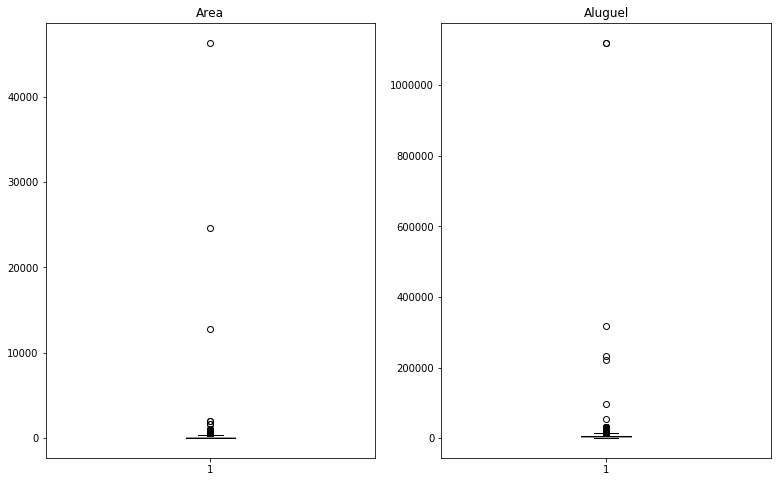

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,8))

axes[0].boxplot(casas['area'])
axes[0].set_title('Area')

axes[1].boxplot(casas['total (R$)'])
axes[1].set_title('Aluguel');


In [11]:
quantis = casas.quantile([0.1, 0.9]) # vamos descobrir uma boa faixa de valores (no caso, acima de 10% e abaixo de 90%)

quantis

,area,rooms,bathroom,parking spaces,hoa (R$),rent amount (R$),property tax (R$),fire insurance (R$),total (R$)
0.1,40.0,1.0,1.0,0.0,0.0,1050.0,0.0,14.0,1384.0
0.9,300.0,4.0,4.0,4.0,2333.8,8959.0,890.9,121.0,11668.0


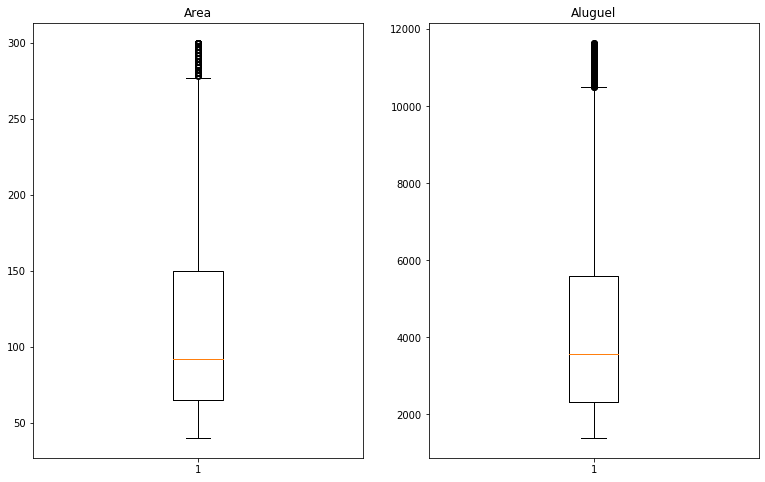

In [12]:
sem_outliers = casas[ (casas['area'] >= quantis.loc[0.1, 'area']) &
                      (casas['area'] <= quantis.loc[0.9, 'area']) &
                     (casas['total (R$)'] >= quantis.loc[0.1, 'total (R$)']) &
                     (casas['total (R$)'] <= quantis.loc[0.9, 'total (R$)'])]

# verificando se a limpeza foi boa...
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,8))

axes[0].boxplot(sem_outliers['area'])
axes[0].set_title('Area')

axes[1].boxplot(sem_outliers['total (R$)'])
axes[1].set_title('Aluguel');

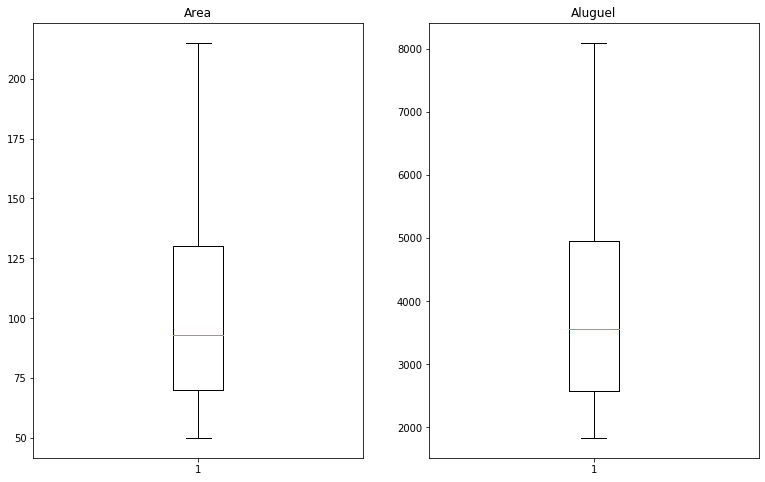

In [13]:
# ainda tivemos outliers... vamos tentar repetir com um intervalo menor (20% - 80%)

quantis = casas.quantile([0.2, 0.8])

sem_outliers = casas[ (casas['area'] >= quantis.loc[0.2, 'area']) &
                      (casas['area'] <= quantis.loc[0.8, 'area']) &
                     (casas['total (R$)'] >= quantis.loc[0.2, 'total (R$)']) &
                     (casas['total (R$)'] <= quantis.loc[0.8, 'total (R$)'])]

# verificando se a limpeza foi boa...
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(13,8))

axes[0].boxplot(sem_outliers['area'])
axes[0].set_title('Area')

axes[1].boxplot(sem_outliers['total (R$)'])
axes[1].set_title('Aluguel');

Text(0, 0.5, 'Preço (R$)')

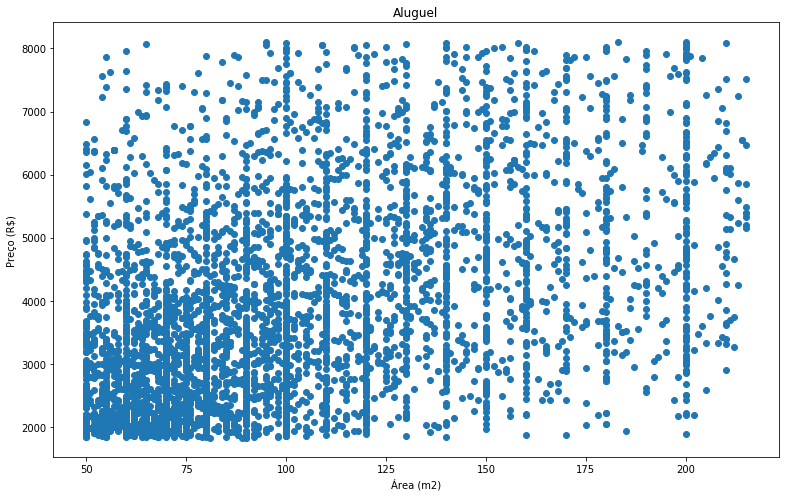

In [14]:
# bem melhor! agora vamos plotar nosso gráfico de dispersão!

plt.figure(figsize=(13, 8))

plt.scatter(sem_outliers['area'], sem_outliers['total (R$)'])
plt.title('Aluguel')
plt.xlabel('Área (m2)')
plt.ylabel('Preço (R$)')